In [1]:
# Librairies indispensables
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Importation des données
url='https://raw.githubusercontent.com/JosueAfouda/Marketing-Pandas/master/marketing.csv'

marketing_df = pd.read_csv(url)
marketing_df.head()


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [5]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


In [17]:
# Les variables date_served, date_subscribed, date_canceled sont des dates et ne sont pas au bon format. 
#Nous les mettrons en Datetime

In [18]:
# Resume statistique
marketing_df.describe().T

,count,unique,top,freq
user_id,10037,7309,a100000882,12
date_served,10021,31,1/15/18,789
marketing_channel,10022,5,House Ads,4733
variant,10037,2,control,5091
converted,10022,2,False,8946
language_displayed,10037,4,English,9793
language_preferred,10037,4,English,9275
age_group,10037,7,19-24 years,1682
date_subscribed,1856,31,1/16/18,163
date_canceled,577,115,4/2/18,15


In [19]:
# Les canaux marketing utlisés par l'entreprise
marketing_df['marketing_channel'].value_counts()

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

In [20]:
# Proportions 
marketing_df['marketing_channel'].value_counts(normalize=True)

House Ads    0.472261
Instagram    0.186689
Facebook     0.185592
Push         0.099082
Email        0.056376
Name: marketing_channel, dtype: float64

In [21]:
# L'entreprise utilise majoritairement (47%) les annonces auto-promotionnelle

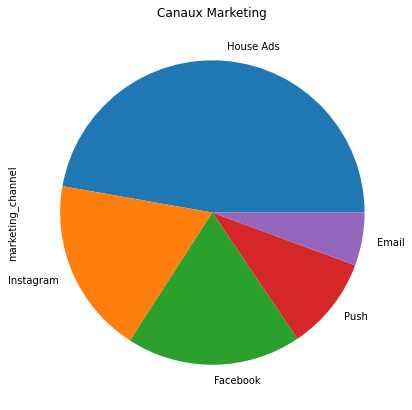

In [22]:
# Canaux marketing
plt.figure(figsize=(7,7))
marketing_df['marketing_channel'].value_counts(normalize=True).plot(kind='pie')
plt.title('Canaux Marketing')
plt.show()

In [25]:
# Mettre les variables dates en Datetime
for col in ['date_served', 'date_subscribed', 'date_canceled' ]:
    marketing_df[col] = pd.to_datetime(marketing_df[col])

In [27]:
#Verification du bon format date
marketing_df.dtypes

user_id                        object
date_served            datetime64[ns]
marketing_channel              object
variant                        object
converted                      object
language_displayed             object
language_preferred             object
age_group                      object
date_subscribed        datetime64[ns]
date_canceled          datetime64[ns]
subscribing_channel            object
is_retained                    object
dtype: object

In [29]:
# Les variables date_served, date_subscribed, date_canceled sont maintenant dans un bon format datetime.

In [30]:
# Quel est le nombre d'utilisateurs retenus par la campagnes marketing?

In [31]:
marketing_df['is_retained'].sum()

1279

In [32]:
# 1279 utilisateurs ont été retenus par la campagne marketing

In [33]:
marketing_df['is_retained'].value_counts(normalize=True)

True     0.689116
False    0.310884
Name: is_retained, dtype: float64

In [34]:
# En proportion cele equivaut à peu prés 0,69% de tous les utilisateurs

In [35]:
marketing_df['subscribing_channel'].unique()

array(['House Ads', 'Email', 'Push', 'Facebook', 'Instagram', nan],
      dtype=object)

In [36]:
# Dictionnaire des chaines distinctes de souscriptions avec leurs codes
dict_channels = {'House Ads':1, 'Instagram':2, 'Facebook':3, 'Push':4, 'Email':5}

In [37]:
# Creation de la colonne 'channel_code'
marketing_df['channel_code'] = marketing_df['subscribing_channel'].map(dict_channels)

In [38]:
# Ajout nouvelle colonne is_correct_lang
marketing_df['is_correct_lang'] = np.where(marketing_df['language_displayed']==marketing_df['language_preferred'],\
                                          'YES', 'NO')

In [39]:
#Ajout d'une colonne 'DoW' date de la semaine
marketing_df['DoW'] = marketing_df['date_subscribed'].dt.dayofweek

In [42]:
# utilisateurs uniques qui voient les annonces marketing chaque jour
daily_users = marketing_df.groupby('date_served')['user_id'].nunique()

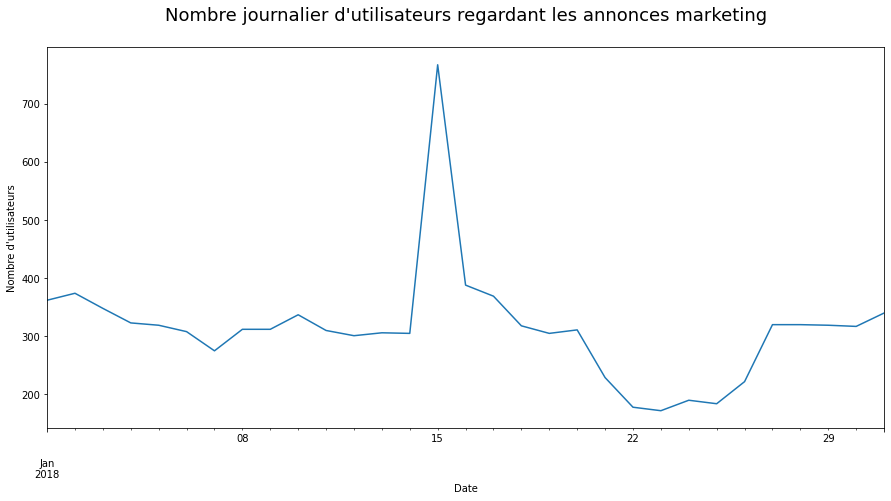

In [43]:
#Visualisation des resultats
plt.figure(figsize=(15,7))
daily_users.plot.line()
plt.xlabel('Date')
plt.ylabel("Nombre d'utilisateurs")
plt.title("Nombre journalier d'utilisateurs regardant les annonces marketing\n", fontsize=18)
plt.show()

In [54]:
# Calcul du taux de conversation global
# Nombre d'utilisateurs uniques
n_unique_users = marketing_df['user_id'].nunique()
print("Le nombre d'utilisateurs uniques est:", n_unique_users)

Le nombre d'utilisateurs uniques est: 7309


In [55]:
marketing_df["converted"]

0         True
1         True
2         True
3         True
4         True
         ...  
10032     True
10033     True
10034    False
10035     True
10036    False
Name: converted, Length: 10037, dtype: object

In [56]:
# Nombre d'utilisateurs uniques ayant suscrit au service
n_suscripteurs = marketing_df[marketing_df["converted"] == True]['user_id'].nunique()
print("Le nombre d'utilisateurs uniques ayant suscript au service est:", n_suscripteurs)

Le nombre d'utilisateurs uniques ayant suscript au service est: 1015


In [58]:
# Taux de conversion global
taux_conv_global = n_suscripteurs / n_unique_users
print(" Le taux de conversion global est egal à:", round(taux_conv_global*100, 2), "%")

 Le taux de conversion global est egal à: 13.89 %


In [59]:
marketing_df['is_retained']

0         True
1         True
2         True
3         True
4         True
         ...  
10032    False
10033     True
10034     True
10035     True
10036     True
Name: is_retained, Length: 10037, dtype: object

In [62]:
# Calcul du taux de retention global d'un mois
# Nombre de personnes qui sont restées abonnées
retained = marketing_df[marketing_df['is_retained'] == True]['user_id'].nunique()
print("Le nombre de personnes qui sont restées abonnées:", retained)

Le nombre de personnes qui sont restées abonnées: 678


In [67]:
taux_retained_global = retained / n_suscripteurs
print("Le taux de retention global est egal à:", round(taux_retained_global*100, 2), "%")

Le taux de retention global est egal à: 66.8 %


### Taux de retention par canal de souscription

In [72]:
# Nombre total d'utilisateurs retenus par canal de marketing
n_retained_per_canal = marketing_df[marketing_df['is_retained'] == True].\
                            groupby('subscribing_channel')['user_id'].nunique()
print(n_retained_per_canal)

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64


In [76]:
# Nombre total d'utilisateurs ayant souscrit un abonnement via chaque canal
n_converted_per_canal = marketing_df[marketing_df['converted'] == True].\
                        groupby('subscribing_channel')['user_id'].nunique()
n_converted_per_canal

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64

In [74]:
# Taux de retention par canal de souscription
taux_retention_per_canal = (n_retained_per_canal / n_converted_per_canal)*100
taux_retention_per_canal.sort_values(ascending=False)

subscribing_channel
Email        87.577640
Push         70.129870
Facebook     68.778281
Instagram    68.103448
House Ads    58.053691
Name: user_id, dtype: float64

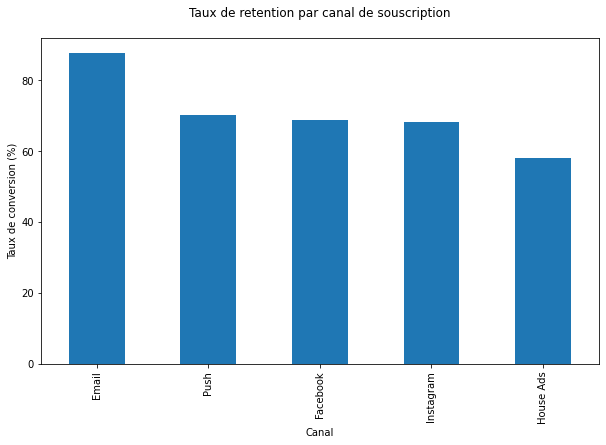

In [77]:
# Visualisation des resultats
plt.figure(figsize=(10,6))
taux_retention_per_canal.sort_values(ascending=False).plot(kind='bar')
plt.title("Taux de retention par canal de souscription\n", fontsize=12)
plt.xlabel("Canal")
plt.ylabel('Taux de conversion (%)')
plt.show()

In [78]:
# Les emails representent le taux de retention les plus eleves des canaux de souscription

### Automatisation du calcul taux de reteneion

In [81]:
# Fonction de calcul du taux de retention
def retention_rate(dataframe, column_names):
    retained =dataframe[dataframe['is_retained'] == True].groupby(column_names)['user_id'].nunique()
    
    converted = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()
    
    retention_rate = retained / converted
    
    return retention_rate
    

In [82]:
# Appel de la fonction retention_rate() pour la verifiction
retention_rate(marketing_df, ['subscribing_channel'])

subscribing_channel
Email        0.875776
Facebook     0.687783
House Ads    0.580537
Instagram    0.681034
Push         0.701299
Name: user_id, dtype: float64

In [86]:
# Taux de retention selon la langue d'affichage de l'annonce
taux_retention_per_langue = retention_rate(marketing_df, ['language_displayed'])
taux_retention_per_langue

language_displayed
Arabic     0.750000
English    0.668467
German     0.773585
Spanish    1.000000
Name: user_id, dtype: float64

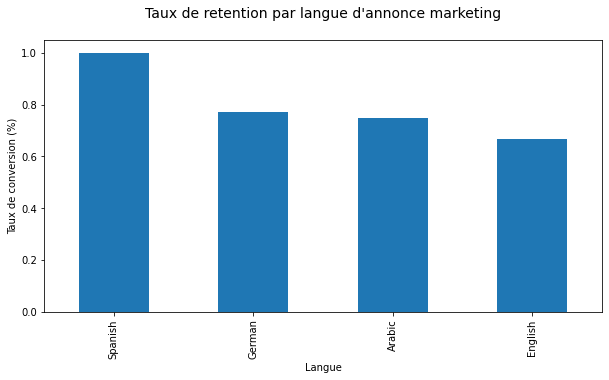

In [87]:
# Visualisation des resultats
plt.figure(figsize=(10, 5))
taux_retention_per_langue.sort_values(ascending = False).plot(kind='bar')
plt.title("Taux de retention par langue d'annonce marketing\n", fontsize=14)
plt.xlabel("Langue")
plt.ylabel("Taux de conversion (%)")
plt.show()


In [88]:
# L'espagnol offre le meilleur de retention environ 100%

In [89]:
# Taux de conversion pr canal d'acquisition
# Nombre d'utilisateurs uniques ayant suscrit au service
n_souscripteurs_par_canal = marketing_df[marketing_df['converted'] == True].\
                            groupby('subscribing_channel')['user_id'].nunique()


In [91]:
#Nombre total de personnes atteintes par la campagne pour chaque canal
total_per_canal = marketing_df.groupby('subscribing_channel')['user_id'].nunique() 

In [95]:
taux_conv_par_canal = (n_souscripteurs_par_canal / total_per_canal)*100
taux_conv_par_canal.sort_values(ascending = False)

subscribing_channel
Facebook     100.000000
House Ads    100.000000
Instagram    100.000000
Push         100.000000
Email         83.854167
Name: user_id, dtype: float64

### Automatisation du calcul  du taux de conversion

In [98]:
# Definition d'une fonction de calcul du taux de conversion
def conversion_rate(dataframe, column_names):
    # Nombre total d'utilisateurs converties
    column_conv = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()
    # Nombre total d'utilisateurs
    column_total = dataframe.groupby(column_names)['user_id'].nunique()
    # Taux de conversion
    conversion_rate = column_conv / column_total
    # Remplacement des valeurs manquantes par 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

In [99]:
# Verification de la fonction
conversion_rate(marketing_df, ['subscribing_channel'])

subscribing_channel
Email        0.838542
Facebook     1.000000
House Ads    1.000000
Instagram    1.000000
Push         1.000000
Name: user_id, dtype: float64

In [100]:
#verification OK

In [101]:
# Taux de conversion par langue de l'annonce
taux_conv_per_langue = conversion_rate(marketing_df, ['language_displayed'])
taux_conv_per_langue

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64

In [102]:
# L'allemand offre le meilleur taux de conversion environ 72 % et un taux de retention de 77 %.
# L'espagnol offre le meilleur taux de retention environ 100 %  mais un taux de conversion de 20 %

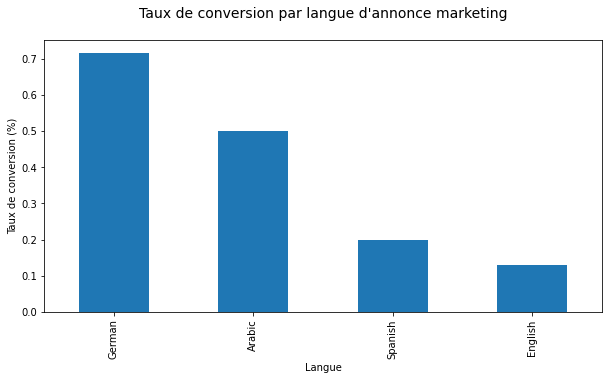

In [103]:
# Visualisation des resultats
plt.figure(figsize=(10, 5))
taux_conv_per_langue.sort_values(ascending = False).plot(kind='bar')
plt.title("Taux de conversion par langue d'annonce marketing\n", fontsize = 14)
plt.xlabel("Langue")
plt.ylabel("Taux de conversion (%)")
plt.show()

In [105]:
# les campagnes marketing en Allemand semblent plus efficaces que les autres langues 
# en ce qui concerne la conversion des utilisateurs.

### Taux de conversion journalier